In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
df =pd.read_csv('../../data/Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


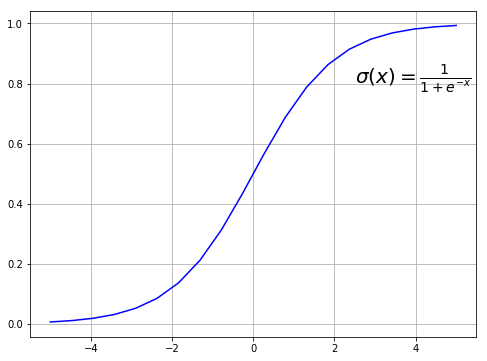

In [9]:
def sigmoid(x):
    return(1/ (1 + np.exp(-x)))

fig = plt.figure(figsize = (8,6))
ax =  fig.add_subplot(111)
x = np.linspace(-5,5 ,20)
plt.grid()
ax.text(2.5 , 0.8 ,r'$\sigma(x) = \frac{1}{1+e^{-x}}$' , fontsize =20)
plt.plot(x,sigmoid(x), 'b')



In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['Iris-setosa','Iris-versicolor', 'Iris-virginica'])
labels = le.transform(df['Species'])
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df[['PetalLengthCm','PetalWidthCm']],labels, test_size = 0.2 , random_state =0)

In [12]:
X_train.shape
X_test.shape

(30, 2)

In [13]:
X_train.shape

(120, 2)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [15]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)        #data is preprocessed

In [17]:
#Now we perform logistic regression
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression(C = 1000.0)
# C is directly related to regularization parameter which is its inverse

In [19]:
model.fit(X_train_std , y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [20]:
np.round(model.predict_proba(X_test_std[0,:].reshape(1,-1)))

array([[0., 0., 1.]])

In [21]:
model.score(X_test_std , y_test)

0.9666666666666667

In [22]:
from sklearn.model_selection import cross_val_score
X = df[['PetalLengthCm','PetalWidthCm']]
y = df['Species']
scores = cross_val_score(model, X,y , cv=5,scoring ='f1_macro')
scores


array([0.96658312, 0.96658312, 0.93265993, 0.93265993, 1.        ])